In [3]:
import pandas as pd
import seaborn as sns
import numpy as num
import matplotlib.pyplot as py

dataframe=pd.read_csv(r"C:\Users\kdbts\OneDrive\文档\DS Projects\Zomato data .csv")
print(dataframe.head())

def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  
                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No 

In [4]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB
None


Text(0.5, 0, 'Type of Restaurant')

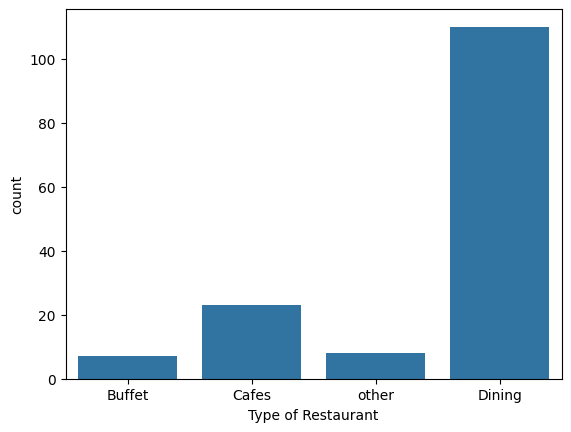

In [8]:
sns.countplot(x=dataframe['listed_in(type)'])
py.xlabel("Type of Restaurant")


Text(0, 0.5, 'Votes')

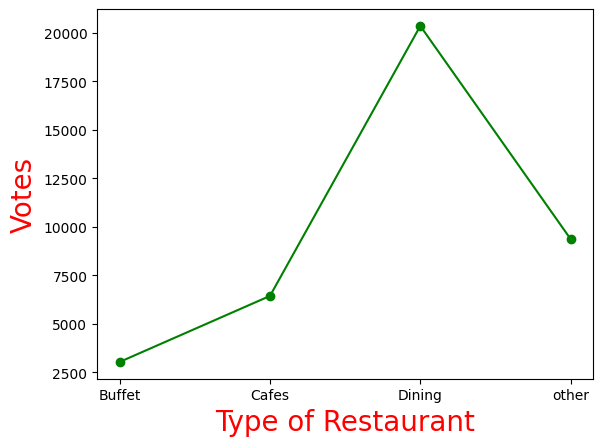

In [9]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
py.plot(result,marker="o",c="green")
py.xlabel("Type of Restaurant",c="red",size=20)
py.ylabel("Votes",c="red",size=20)


In [11]:
max_votes=dataframe['votes'].max()
restaurant_with_max_votes=dataframe.loc[dataframe['votes']==max_votes,'name']
print("Restaurant(s) with maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

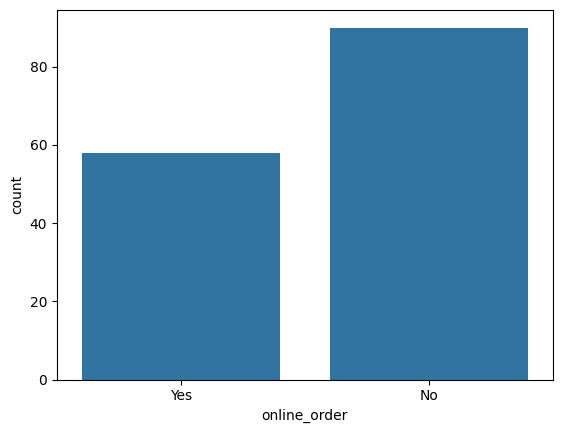

In [12]:
sns.countplot(x=dataframe['online_order'])

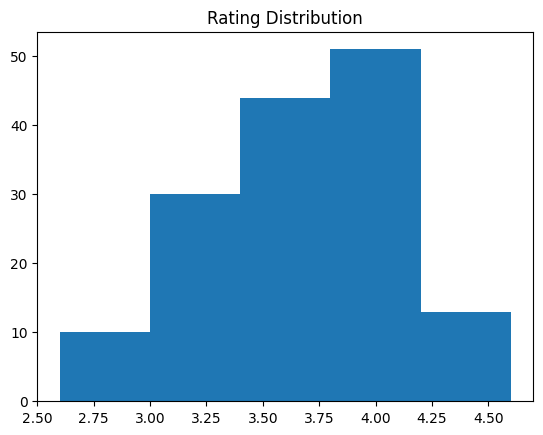

In [13]:
py.hist(dataframe['rate'],bins=5)
py.title("Rating Distribution")
py.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

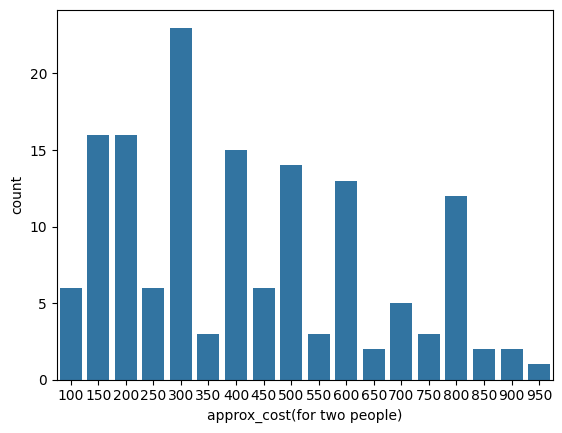

In [14]:
sns.countplot(x=dataframe['approx_cost(for two people)'])

<Axes: xlabel='online_order', ylabel='rate'>

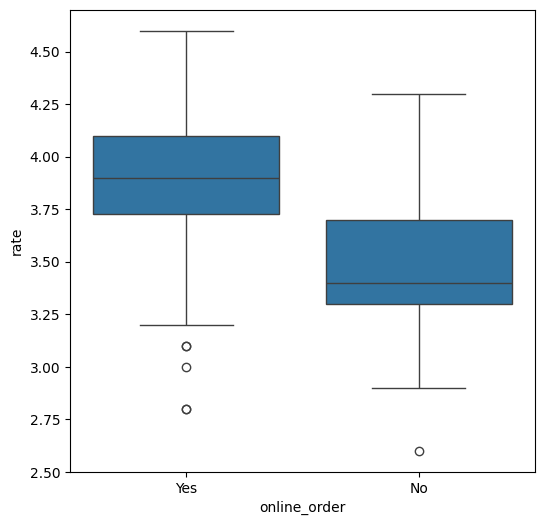

In [15]:
py.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

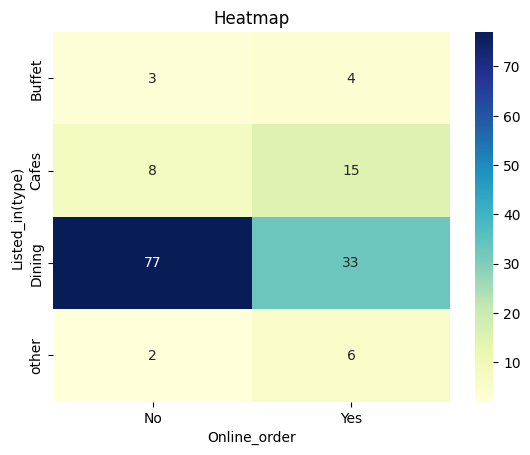

In [16]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size' ,fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
py.title("Heatmap")
py.xlabel("Online_order")
py.ylabel("Listed_in(type)")
py.show()
         